In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln
from numpy import exp
from scipy.special import factorial
import scipy.optimize as spo 
import os
import math
from itertools import zip_longest
from itertools import combinations_with_replacement
from itertools import permutations
from datetime import datetime  
import time
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import linregress
pasta = os.path.abspath('Experimental_data') 
my_path = os.getcwd() +'/Comparison'
data = {}
R= 8.31/1000 #[kJ/mol]


def s0(T):
        if T !=0:
            t=T/1000
            A = 33.066178
            B = -11.363417
            C = 11.432816
            D = -2.772874
            E = -0.158558
            G = 172.707974
            S0 = A*ln(t) + B*t + C*(t**2)/2 + D*(t**3)/3 - E/(2*t**2) + G # Hydrogen standard entropy J/mol of H2- NIST
            S0 = S0/1000 #kJ/mol of H2
            return S0
        else:
            return 0          
        
        
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier


# Simulation BCC Lattice - Tetrahedral sites occupation

In [3]:
###################################### SIMULATION TETRAHEDRAL BCC STRUCTURE ########################3

inicio_tot = time.time()
data_f_T_BCC ={}
neighbors = [np.sqrt(2)/4,1/2,np.sqrt(6)/4]
for NN in neighbors:
    inicio = time.time()
    #data_f[lattice_param] ={}
    sites_i=np.zeros(3)
    sites_b=np.zeros(3)
    #sites_b=np.array(sites_b)
    total_sites=[]
    sites_v_temp = []
    occupancy = {}


    wyckoff_positions = []
    wyckoff_positions_1 = [0,1/2,1/4]
    wyckoff_positions_2=  [0,1/2,3/4]
    wyckoff_positions = wyckoff_positions+ list(permutations(wyckoff_positions_1,3)) + list(permutations(wyckoff_positions_2,3)) 
    wyckoff_positions = np.array(wyckoff_positions)
    sites_v_temp = wyckoff_positions
    x_cells = np.arange(27)
    y_cells = np.arange(27)
    z_cells = np.arange(28)
    for k in z_cells:
        for j in y_cells:
            for i in x_cells:
                if (i,j,k)!=(0,0,0):
                    sites_v_temp= np.append(sites_v_temp,wyckoff_positions+(i,j,k),axis=0)    


    total_sites = sites_v_temp
    sites_v_temp = np.array(sites_v_temp)
    while len(sites_v_temp)>0:
        idx = np.random.randint(0,len(sites_v_temp))
        sites_i = np.vstack((sites_i,np.array(sites_v_temp[idx])))
        actual_site = sites_v_temp[idx]
        sites_v_temp = np.delete(sites_v_temp,idx,axis=0)
        blocked_idx = np.argwhere(np.sqrt(np.sum((sites_v_temp-actual_site)**2,axis=1))<=NN)
        if len(blocked_idx) >0:
            blocked = np.concatenate(np.take(sites_v_temp,blocked_idx,axis=0),axis=0)
            sites_b = np.vstack((sites_b,blocked))
            sites_v_temp= np.delete(sites_v_temp,blocked_idx,axis=0)
        occupancy[len(sites_i)/len(total_sites)] = [len(sites_b)/len(total_sites),len(sites_v_temp)/len(total_sites)]
    sites_i = np.delete(sites_i,0,axis=0)
    sites_b = np.delete(sites_b,0,axis=0)

    f_i = list(occupancy.keys())
    f_b = [occupancy[f_i][0] for f_i in occupancy.keys() ]
    f_v= [occupancy[f_i][1] for f_i in occupancy.keys() ]
    print(NN,len(total_sites),len(sites_i),len(sites_b),len(sites_v_temp), len(sites_i)+len(sites_b))
    data_f_T_BCC[NN]=[f_i,f_b,f_v,sites_i,sites_b,total_sites]
    fim = time.time()

    tempo_decorrido = fim - inicio
    print("Iteration time:", tempo_decorrido/60, "minutes")

fim_tot = time.time()

tempo_decorrido = fim_tot - inicio_tot
print("Total time:", tempo_decorrido/60, "minutes")

0.3535533905932738 244944 87283 157661 0 244944
Iteration time: 4.9870560963948565 minutes
0.5 244944 55421 189523 0 244944
Iteration time: 3.400782589117686 minutes
0.6123724356957945 244944 33797 211147 0 244944
Iteration time: 1.8353591918945313 minutes
Total time: 10.223218576113384 minutes


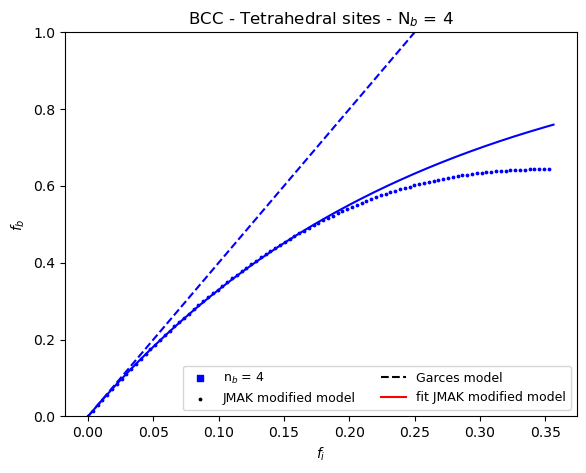

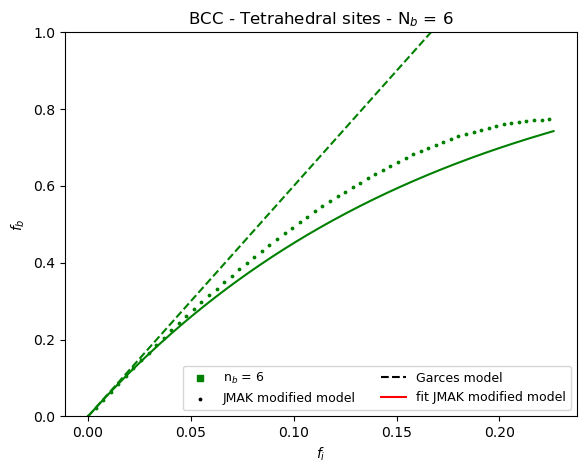

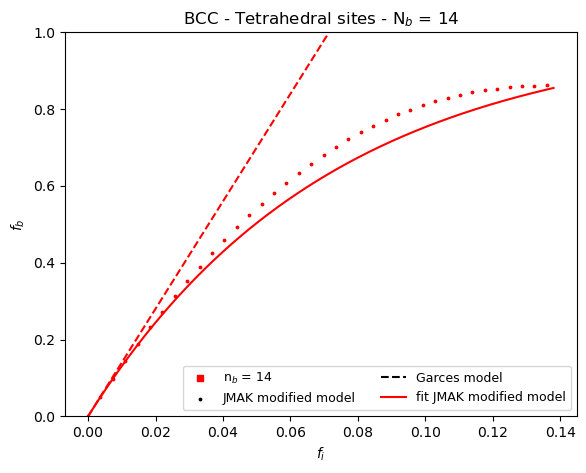

In [4]:
from scipy.optimize import curve_fit
def JMAK_BCC_T(x,Nb):
    return 1-exp(-Nb*x)
    
    
co = ['blue','green','red']
i=0
for NN in data_f_T_BCC.keys():
    
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    nb = JMAK_nb
    
    f_i= np.array(data_f_T_BCC[NN][0])
    f_b= data_f_T_BCC[NN][1]
    
    
    my_file = f'fb_BCC_T_{nb}'
    fig = plt.figure()

    # Add set of axes to figure
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
    
      

    #plot JMAK model
    
    axes.plot(f_i,JMAK_BCC_T(f_i,nb), color = co[i])
    
    #plot Garces Model
    axes.plot(f_i,nb*f_i, linestyle='--', color=co[i])#, label = f'f$_b$ - Garces model - n$_b$ = {nb}')
    
    #plot Numerical simulation results
    x=np.array([data_f_T_BCC[NN][0][idx] for idx in range(0,len(data_f_T_BCC[NN][0]),900)])
    y=np.array([data_f_T_BCC[NN][1][idx] for idx in range(0,len(data_f_T_BCC[NN][1]),900)])
        
    axes.scatter(x,y,s=3,color=co[i]) 
    axes.scatter([],[],s=15, color=co[i], marker = 's', label = f'n$_b$ = {nb}')
    i=i+1
    axes.scatter([],[],s=3, color = 'black', label = f'JMAK modified model')
    axes.plot([],[],linestyle ='--', color = 'black', label = f'Garces model')
    axes.plot([],[], color = 'red', label = f'fit JMAK modified model')
    axes.set_ylabel(f'$f_b$')
    axes.set_xlabel(f'$f_i$')
    axes.set_ylim([0,1])
    #axes.set_xlim([0,0.4])
    axes.set_title(f'BCC - Tetrahedral sites - N$_b$ = {nb}')
    axes.legend(loc=0,ncol=2, fontsize = 9)
#fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')


# Setting Garces model

In [5]:
#AVRAMI MODEL

class Phase:
    def __init__(self,name):
        self.name = name
        self.r = []
        self.theta = []
        self.cH_step = []
        self.cH = []
        self.temperatures = []
        self.n_site_type = [] # 4 for tetrahedral sites, 6 for octahedral sites 
        self.cH_limit = []
        self.S = {}
        self.S_c = {}
        self.mu_H = {}
        self.dSc = {}
        self.mu_M = {}
        self.dS = {}
        self.dS_c = {}
        
        
    @property
    def set_cH_limit(self):   
        self.cH_limit = self.theta/self.r
        
        
        
        
    @property
    def set_cH(self):
        c_H = []
        for i in range(1,int(self.theta/self.cH_step +1)):
            if (self.cH_step*i)< self.cH_limit:
                c_H.append(truncate(self.cH_step*i,4))
        self.cH = np.array(c_H)
        
    
    def s0(self,T):
        if T !=0:
            t=T/1000
            A = 33.066178
            B = -11.363417
            C = 11.432816
            D = -2.772874
            E = -0.158558
            G = 172.707974
            S0 = A*ln(t) + B*t + C*(t**2)/2 + D*(t**3)/3 - E/(2*t**2) + G # Hydrogen standard entropy J/mol of H2- NIST
            S0 = S0/1000 #kJ/mol of H2
            return S0
        else:
            return 0
        
        
    @property
    def calculate_entropy(self):
        for T in self.T:
            if T!=0:
                self.fh = self.cH/self.theta
                self.Pb = (self.r-1)*self.fh
                self.Pv = (1 - self.fh - self.Pb)/(1-self.Pb)
                self.Ph = self.fh/(1-self.Pb)
                self.S_c[T] = -R *self.theta*(1-self.Pb)*(self.Ph*ln(self.Ph)+self.Pv*ln(self.Pv))
                self.S[T] = self.S_c[T] - ((self.cH * self.s0(T))/2)
            else:
                self.S_c[T] = np.zeros(len(self.cH))
                self.S[T] = self.S_c[T]
                self.f[T].append([fh,Pb,Pv])
            
    @property
    def calculate_dSc(self):
        fh = self.cH/self.theta
        for T in self.T:
            self.dSc[T] =  (-R*ln((fh*((1-(self.r-1)*fh)**(self.r-1))/(1-self.r*fh)**self.r)))
           

In [34]:
#Calculating Garces model

######### Nb = 4 ##############
Temperatures = [25+273.15]
garces_T_BCC_1NN = Phase('delta')
garces_T_BCC_1NN.theta = 6
garces_T_BCC_1NN.r = 5
garces_T_BCC_1NN.n_site_type = 4 #occupation of tetrahedral sites
garces_T_BCC_1NN.T = Temperatures
garces_T_BCC_1NN.set_cH_limit
garces_T_BCC_1NN.cH_step = 0.0005
garces_T_BCC_1NN.set_cH
garces_T_BCC_1NN.calculate_entropy
garces_T_BCC_1NN.calculate_dSc

######### Nb = 6 ##############
garces_T_BCC_2NN = Phase('delta')
garces_T_BCC_2NN.theta = 6
garces_T_BCC_2NN.r = 7
garces_T_BCC_2NN.n_site_type = 4 #occupation of tetrahedral sites
garces_T_BCC_2NN.T = Temperatures
garces_T_BCC_2NN.set_cH_limit
garces_T_BCC_2NN.cH_step = 0.0005
garces_T_BCC_2NN.set_cH
garces_T_BCC_2NN.calculate_entropy
garces_T_BCC_2NN.calculate_dSc


######### Nb = 14 ##############
Temperatures = [25+273.15]
garces_T_BCC_3NN = Phase('delta')
garces_T_BCC_3NN.theta = 6
garces_T_BCC_3NN.r = 15
garces_T_BCC_3NN.n_site_type = 4 #occupation of tetrahedral sites
garces_T_BCC_3NN.T = Temperatures
garces_T_BCC_3NN.set_cH_limit
garces_T_BCC_3NN.cH_step = 0.0005
garces_T_BCC_3NN.set_cH
garces_T_BCC_3NN.calculate_entropy
garces_T_BCC_3NN.calculate_dSc

garces_T_BCC = [garces_T_BCC_1NN,garces_T_BCC_2NN,garces_T_BCC_3NN]

# Setting JMAK model parameters

In [21]:
#JMAK FIT MODEL

class Phase_fit:
    def __init__(self,name):
        self.name = name
        self.r = []
        self.theta = []
        self.cH_step = []
        self.cH = []
        self.temperatures = []
        self.n_site_type = [] # 4 for tetrahedral sites, 6 for octahedral sites 
        self.cH_limit = []
        self.S = {}
        self.S_fit = {}
        self.S_c = {}
        self.S_c_fit = {}
        self.occupation_k_site = {}
        self.mu_H = {}
        self.dSc = {}
        self.mu_M = {}
        self.dS = {}
        self.dS_c = {}
        self.dSc_fit = {}
        self.nb = []
        
        
    @property
    def set_cH_limit(self):   
        if self.n == 0:
            self.cH_limit = self.theta/(self.nb+1)
        if self.n !=0:
            def Pb(x):
                fb_extended = (self.nb)*(x/(self.theta)) #JMAK
                return x-self.theta*exp(-fb_extended) 
                
            x0 = 0.005
            bnds = [(0,self.theta)]
            
            cons = {'type': 'eq', 'fun': lambda x: Pb(x),
                           }
            cH_limit = spo.minimize(Pb,x0, options = {"disp": True, "maxiter": 2000}, method = 'SLSQP',  constraints = cons, bounds = bnds)
            self.cH_limit = cH_limit.x
        
        
        
        
    @property
    def set_cH(self):
        c_H = []
        for i in range(1,int(self.theta/self.cH_step +1)):
            if (self.cH_step*i)< self.cH_limit:
                c_H.append(truncate(self.cH_step*i,4))
        self.cH = np.array(c_H)
        
    
    def s0(self,T):
        if T !=0:
            t=T/1000
            A = 33.066178
            B = -11.363417
            C = 11.432816
            D = -2.772874
            E = -0.158558
            G = 172.707974
            S0 = A*ln(t) + B*t + C*(t**2)/2 + D*(t**3)/3 - E/(2*t**2) + G # Hydrogen standard entropy J/mol of H2- NIST
            S0 = S0/1000 #kJ/mol of H2
            return S0
        else:
            return 0
        
        
    @property
    def calculate_entropy(self):
        for T in self.T:
            if T!=0:
                self.fh = self.cH/self.theta
                self.Pb = 1-exp(-(self.nb)*(self.fh))
                self.Pv = (1 - self.fh - self.Pb)/(1-self.Pb)
                self.Ph = self.fh/(1-self.Pb)
                self.S_c[T] = -R *self.theta*(1-self.Pb)*(self.Ph*ln(self.Ph)+self.Pv*ln(self.Pv))
                
        
                
                self.S[T] = self.S_c[T] - ((self.cH * self.s0(T))/2)
            else:
                self.S_c[T] = np.zeros(len(self.cH))
                self.S[T] = self.S_c[T]
                self.f[T].append([fh,Pb,Pv])
            
    @property
    def calculate_dSc(self):
        fh = self.cH/self.theta
        for T in self.T:               
                self.dSc[T] =  (-R*ln((fh*(exp(-(self.nb)*fh))**((self.nb)*exp(-(self.nb)*fh))/(exp(-(self.nb)*fh)-fh)**(1+(self.nb)*exp(-(self.nb)*fh)) )))
            
            
   


# Calculation of 1st, 2nd, and 3rd first NN blocking of T-sites - BCC structure

In [22]:
#Avrami model calculations
Temperatures = [25+273.15]
n = 1
############ Nb=4 ##############
JMAK_T_BCC_1NN = Phase_fit('alpha')                           #name the phase: alpha, beta or delta
JMAK_T_BCC_1NN.theta = 6                                  #configurational entropy parameter: quantity of interstitial sites per metal atom
JMAK_T_BCC_1NN.r = 5                                  #configurational entropy parameter: site blocking effect
JMAK_T_BCC_1NN.nb = 4
JMAK_T_BCC_1NN.n_site_type = 4                            #occupation of tetrahedral sites
JMAK_T_BCC_1NN.n = n                                   #set the blocking model n = 0 for Garces, n=1 Avrami with ve linear, n = 4 avrami with ve 3D
JMAK_T_BCC_1NN.T = Temperatures
JMAK_T_BCC_1NN.set_cH_limit                               #set the Hydrogen composition limit for the phase
JMAK_T_BCC_1NN.cH_step = 0.0005                           #set the step variation in the Hydrogen composition for the termodynamic calculation
JMAK_T_BCC_1NN.set_cH                                     #set all Hydrogen composition possible for the phase
JMAK_T_BCC_1NN.calculate_entropy
JMAK_T_BCC_1NN.calculate_dSc
########## Nb=6 ##############
JMAK_T_BCC_2NN = Phase_fit('beta')
JMAK_T_BCC_2NN.theta = 6
JMAK_T_BCC_2NN.r = 7 
JMAK_T_BCC_2NN.nb = 6
JMAK_T_BCC_2NN.n_site_type = 4 #occupation of tetrahedral sites
JMAK_T_BCC_2NN.n = n
JMAK_T_BCC_2NN.T = Temperatures
JMAK_T_BCC_2NN.set_cH_limit
JMAK_T_BCC_2NN.cH_step = 0.0005
JMAK_T_BCC_2NN.set_cH
JMAK_T_BCC_2NN.calculate_entropy
JMAK_T_BCC_2NN.calculate_dSc
######### Nb = 14 ##############
JMAK_T_BCC_3NN = Phase_fit('delta')
JMAK_T_BCC_3NN.theta = 6
JMAK_T_BCC_3NN.r = 15
JMAK_T_BCC_3NN.nb = 14
JMAK_T_BCC_3NN.n_site_type = 4 #occupation of tetrahedral sites
JMAK_T_BCC_3NN.n = n 
JMAK_T_BCC_3NN.T = Temperatures
JMAK_T_BCC_3NN.set_cH_limit
JMAK_T_BCC_3NN.cH_step = 0.0005
JMAK_T_BCC_3NN.set_cH
JMAK_T_BCC_3NN.calculate_entropy
JMAK_T_BCC_3NN.calculate_dSc

JMAK_T_BCC = [JMAK_T_BCC_1NN,JMAK_T_BCC_2NN,JMAK_T_BCC_3NN]

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.822239362210155e-07
            Iterations: 5
            Function evaluations: 10
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.948397164776907e-12
            Iterations: 6
            Function evaluations: 12
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.237935978870013e-08
            Iterations: 6
            Function evaluations: 12
            Gradient evaluations: 6


/tmp/ipykernel_24315/2959541246.py:7: RuntimeWarning: divide by zero encountered in log
  return -R*6*(1-fb)*(Pi*ln(Pi)+Pv*ln(Pv))
/tmp/ipykernel_24315/2959541246.py:7: RuntimeWarning: invalid value encountered in log
  return -R*6*(1-fb)*(Pi*ln(Pi)+Pv*ln(Pv))
/tmp/ipykernel_24315/2959541246.py:7: RuntimeWarning: invalid value encountered in multiply
  return -R*6*(1-fb)*(Pi*ln(Pi)+Pv*ln(Pv))


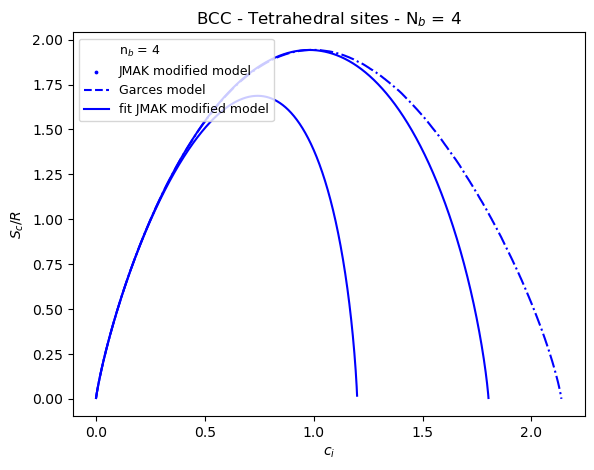

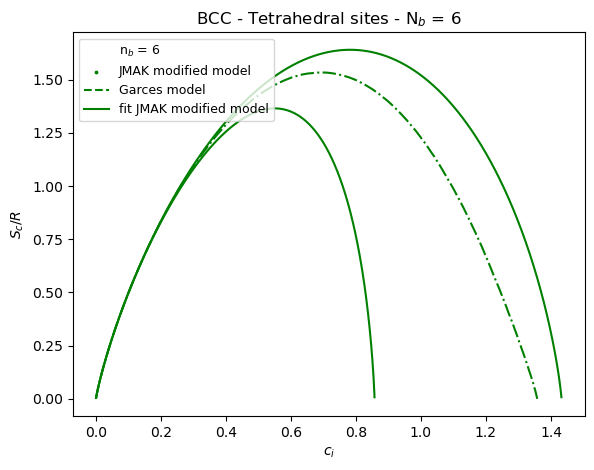

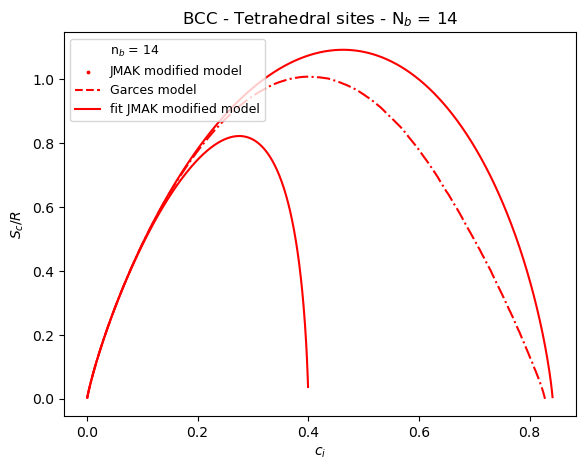

In [76]:
from scipy.optimize import curve_fit
def JMAK_BCC_T(x,Nb):
    return 1-exp(-Nb*x)
def S_C(fi,fv,fb):
    Pi=fi/(1-fb)
    Pv=fv/(1-fb)
    return -R*6*(1-fb)*(Pi*ln(Pi)+Pv*ln(Pv))
    
T = Temperatures[0]    
co = ['blue','green','red']
i=0
for NN in data_f_T_BCC.keys():
    
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    nb = JMAK_nb
    
    f_i= np.array(data_f_T_BCC[NN][0])
    f_b= np.array(data_f_T_BCC[NN][1])
    f_v = 1-f_i-f_b
    
    
    my_file = f'config_S_BCC_T_{nb}'
    fig = plt.figure()

    # Add set of axes to figure
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
    
      

    #plot JMAK model
    axes.plot(JMAK_T_BCC[i].cH,JMAK_T_BCC[i].S_c[T]/R,color = co[i])
    
    
    
    #plot Garces Model
    axes.plot(garces_T_BCC[i].cH,garces_T_BCC[i].S_c[T]/R,color = co[i])
    
    #plot Numerical simulation results
    axes.plot(f_i*6,S_C(f_i,f_v,f_b)/R, ls= "-.", color = co[i])
    
    axes.scatter([],[],s=15, color='white', marker = 's', label = f'n$_b$ = {nb}')
    
    axes.scatter([],[],s=3, color = co[i], label = f'JMAK modified model')
    axes.plot([],[],linestyle ='--', color = co[i], label = f'Garces model')
    axes.plot([],[], color = co[i], label = f'fit JMAK modified model')
    axes.set_ylabel(f'$S_c/R$')
    axes.set_xlabel(f'$c_i$')
    axes.set_title(f'BCC - Tetrahedral sites - N$_b$ = {nb}')
    axes.legend(loc='upper left',ncol=1, fontsize = 9)
    fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')
    i=i+1


# Experimental data

In [10]:
#Importing data extracted from Veleckis article plots

for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        if '.csv' in arquivo:
            if arquivo[0:-10] in data.keys():
                None
            else:
                data[arquivo[0:-10]] = {}

for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        if '.csv' in arquivo:
            data[arquivo[0:-10]][float(arquivo[-9:-4])+273.15] = pd.read_csv(os.path.join(diretorio, arquivo), sep = ';',decimal=",", names=('cH', 'sqrtP(torr)'), dtype={'cH':float, 'sqrtP(torr)': float},skiprows=2).to_numpy()
            print(os.path.join(diretorio, arquivo))
             
for element in data.keys():            
    for T in data[element].keys():
        for i in np.where(np.unique(data[element][T][0:,0],return_counts=True)[1]>1)[0]:
            data[element][T] = np.delete(data[element][T],i,axis=0)
            
            
            

/home/dell/Anaconda/Experimental_data/Ta_630.6.csv
/home/dell/Anaconda/Experimental_data/Nb_376.2.csv
/home/dell/Anaconda/Experimental_data/Nb_671.0.csv
/home/dell/Anaconda/Experimental_data/V_245.6.csv
/home/dell/Anaconda/Experimental_data/Nb_479.9.csv
/home/dell/Anaconda/Experimental_data/Ta_399.8.csv
/home/dell/Anaconda/Experimental_data/Nb_352.5.csv
/home/dell/Anaconda/Experimental_data/Ta_550.4.csv
/home/dell/Anaconda/Experimental_data/Ta_425.7.csv
/home/dell/Anaconda/Experimental_data/Nb_499.9.csv
/home/dell/Anaconda/Experimental_data/V_368.6.csv
/home/dell/Anaconda/Experimental_data/Nb_419.9.csv
/home/dell/Anaconda/Experimental_data/Ta_376.2.csv
/home/dell/Anaconda/Experimental_data/Nb_544.8.csv
/home/dell/Anaconda/Experimental_data/V_554.0.csv
/home/dell/Anaconda/Experimental_data/Nb_399.8.csv
/home/dell/Anaconda/Experimental_data/Nb_459.9.csv
/home/dell/Anaconda/Experimental_data/V_289.9.csv
/home/dell/Anaconda/Experimental_data/V_309.0.csv
/home/dell/Anaconda/Experimental_dat

In [11]:
#Data from Veleckis article tables


#Enthalpy
H_V_data =[6.93,7.00,7.03,7.15,7.23,7.32,7.38,7.46,7.52,7.58,7.61,7.68,7.75,7.79,7.85,7.91,7.98,8.02,8.06,8.10,8.14,8.19,8.25,8.30,8.38,8.45,8.52,8.59,8.62,8.62,8.61,8.64,8.49,8.40,8.39]
H_Nb_data=[8.44,8.57,8.65,8.69,8.73,8.78,8.81,8.90,8.97,9.04,9.15,9.22,9.28,9.34,9.41,9.48,9.54,9.61,9.69,9.74,9.80,9.88,9.95,10.04,10.11,10.18,10.23,10.30,10.35,10.44,10.52,10.59,10.68,10.75,10.83,10.87,10.92,10.95,10.97,10.98]
H_Ta_data=[8.05,8.11,8.15,8.25,8.30,8.36,8.41,8.47,8.52,8.58,8.66,8.72,8.76,8.80,8.81,8.82,8.86,8.90,8.96,8.99,9.03,9.07,9.11,9.18,9.28,9.32,9.34,9.34]

#Data of the article is in mol of H2


H_V = np.zeros((len(H_V_data),2))
H_Nb = np.zeros((len(H_Nb_data),2))
H_Ta = np.zeros((len(H_Ta_data),2))

H_V[0:,0] = np.arange(len(H_V_data))/100 #setting cH vector as in the table
H_V[0:,1] = np.array(H_V_data)/2 #conversion mol of H2 -> mol of H
H_Nb[0:,0] = np.arange(len(H_Nb_data))/100
H_Nb[0:,1] = np.array(H_Nb_data)/2
H_Ta[0:,0] = np.arange(len(H_Ta_data))/100
H_Ta[0:,1] = np.array(H_Ta_data)/2  



#Entropy
R_article = 1.987
S_V_data= [4.33,5.94,6.89,7.54,8.07,8.50,8.89,9.21,9.51,9.77,10.00,10.25,10.45,10.67,10.88,11.10,11.26,11.43,11.59,11.77,11.94,12.14,12.31,12.55,12.78,13.02,13.28,13.47,13.64,13.80,13.90,14.05,14.17,14.44]
S_Nb_data=[4.91,6.36,7.18,7.77,8.23,8.61,8.99,9.30,9.60,9.92,10.17,10.38,10.59,10.79,10.99,11.16,11.34,11.53,11.69,11.84,12.02,12.18,12.37,12.53,12.68,12.83,12.99,13.13,13.32,13.51,13.70,13.92,14.13,14.36]
S_Ta_data = [4.74,6.16,7.08,7.70,8.20,8.62,8.99,9.31,9.62,9.93,10.21,10.43,10.64,10.81,10.98,11.17,11.36,11.57,11.74,11.94,12.13,12.32,12.56,12.84,13.00,13.24,13.42]

S_V = np.zeros((len(S_V_data),2))
S_Nb = np.zeros((len(S_Nb_data),2))
S_Ta = np.zeros((len(S_Ta_data),2))

S_V[0:,0] = np.arange(len(S_V_data))/100
S_V[0:,1] = np.array(S_V_data)/2
S_Nb[0:,0] = np.arange(len(S_Nb_data))/100
S_Nb[0:,1] = np.array(S_Nb_data)/2
S_Ta[0:,0] = np.arange(len(S_Ta_data))/100
S_Ta[0:,1] = np.array(S_Ta_data)/2

In [12]:
# Pressure to adimentional

Nb_SI ={}
V_SI= {}
Ta_SI = {}


torr_Pa = 133.322
p0= 101325


for element in data.keys():
    for T in data[element]:
        data[element][T][0:,1]= (data[element][T][0:,1]**2)*torr_Pa/p0
        

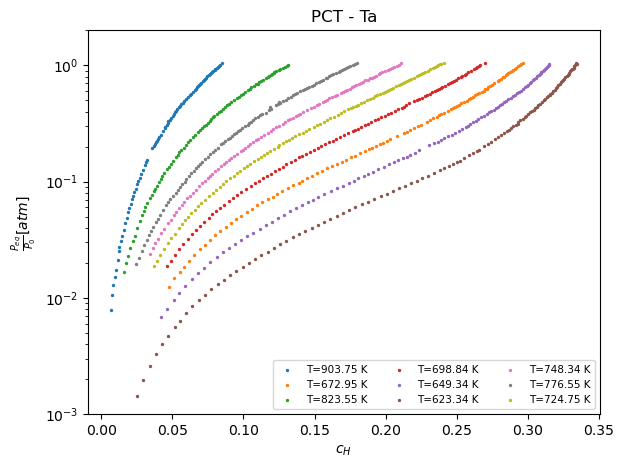

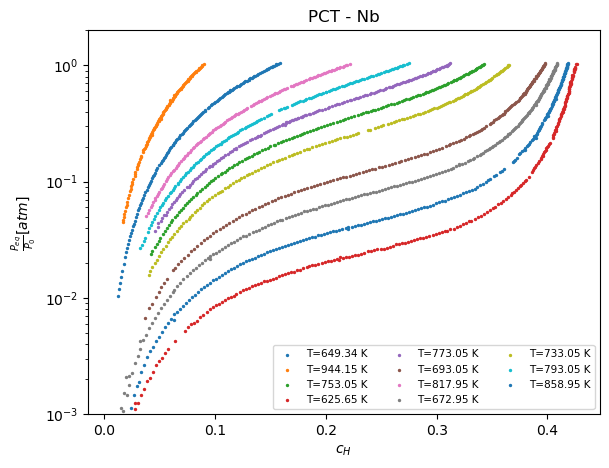

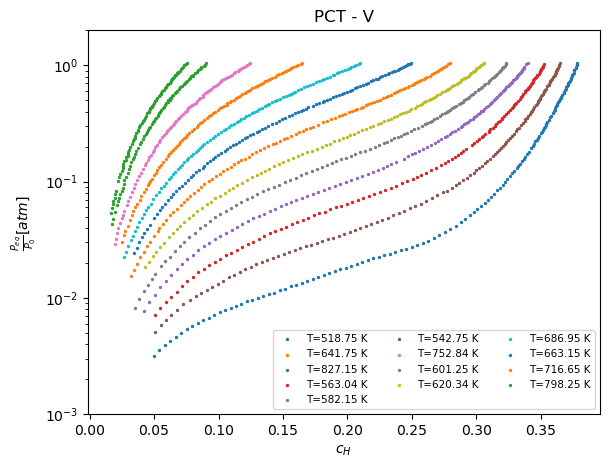

In [13]:
#Plot PCTs

for element in data.keys():
    my_file= f'PCT_{element}'
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    for i in data[element]:
        axes.scatter(data[element][i][0:,0],data[element][i][0:,1],s=2,label = f'T={truncate(i,2)} K')
    axes.set_xlabel('$c_H$') 
    axes.set_ylabel(r"$\frac{P_{eq}}{P_0}[atm]$ ")
    axes.set_title(f"PCT - {element}")
    axes.set_yscale('log')
    axes.set_ylim([10**-3,2])
    axes.legend(loc=0,ncol=3, fontsize='7.5')
    fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')

In [14]:
#Determination of partial molar enthalpy and entropy from PCTs

data_Sc={}
data_config = {}
H={}
S={}
data_P ={}
mesh_points = 100000
step = int(0.05*mesh_points)
for element in data.keys():
    data_Sc[element]= {}
    data_config[element]= {}
    H[element]=[]
    S[element] =[]
    data_P[element]={}
    for cH in range(0,int(max(data[element][min(data[element].keys())][0:,0])*mesh_points),step):
        cH=cH/100000

        temp=[]
        for T in data[element].keys():
            try:
                idx = np.where(abs(data[element][T][0:,0]-cH)<0.002)[0][0]
                temp.append([T,data[element][T][idx,1]])
            except:
                None
            data_P[element][cH]=np.array(temp)
        if len(temp)>2:  
            x=1/(np.array(temp)[0:,0])
            y=ln(np.array(temp)[0:,1])

            (slope, intercept, r_value, p_value, std_err) = linregress(x, y)

            dH_temp = slope*R/2
            dS_temp = intercept*R/2




            H[element].append([cH,dH_temp])
            S[element].append([cH,dS_temp])
   
    H[element]= np.array(H[element])
    S[element]= np.array(S[element])

In [15]:
#removing outlier in vanadium data

H['V'] = np.delete(H["V"],6,axis=0) 
S['V'] = np.delete(S["V"],6,axis=0)

/tmp/ipykernel_24315/1157028603.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta_cores = plt.cm.get_cmap('Dark2')


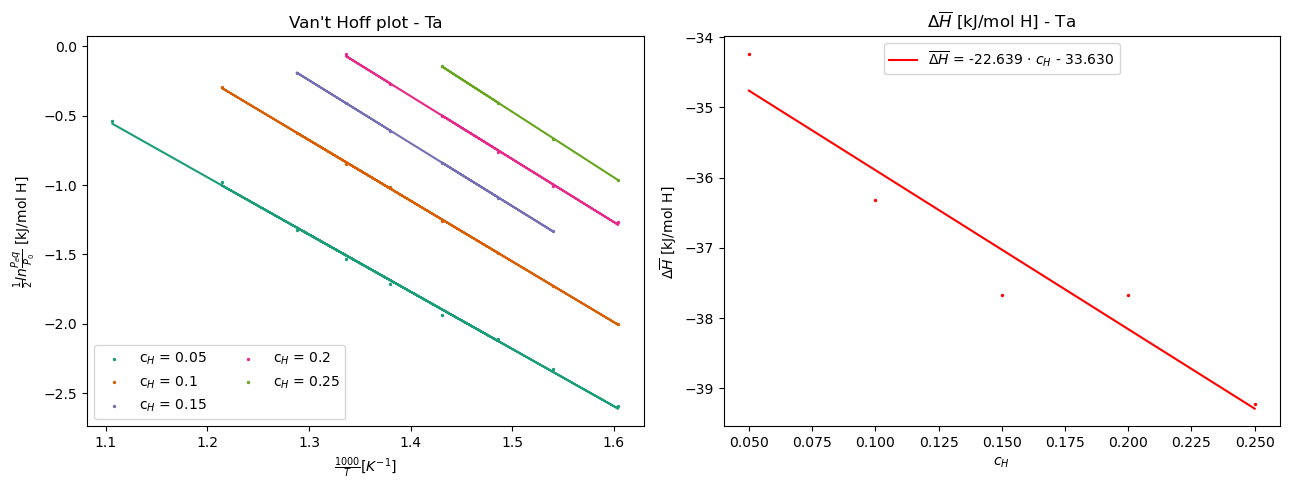

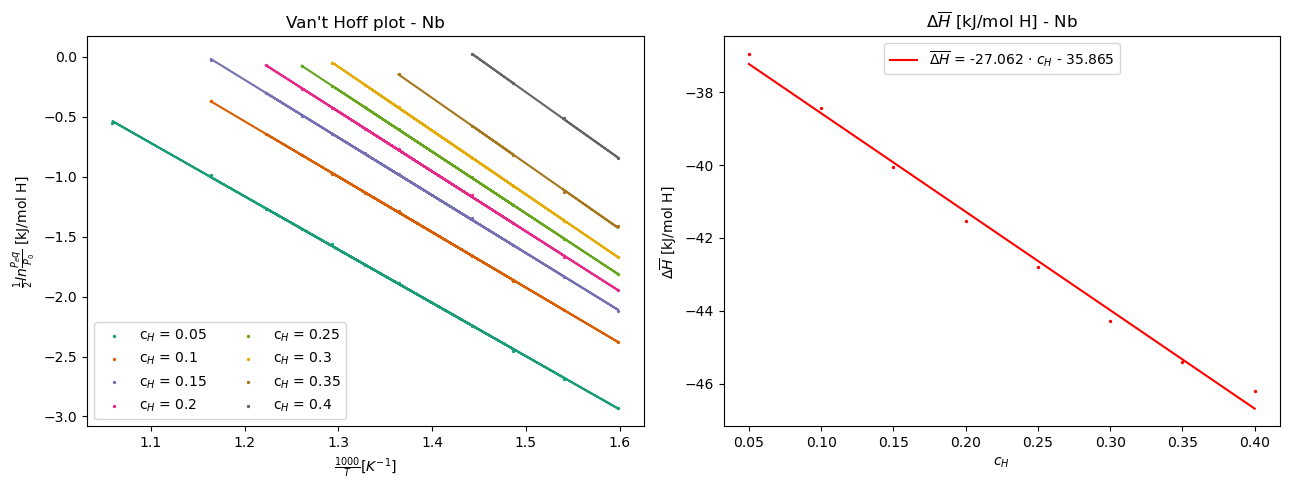

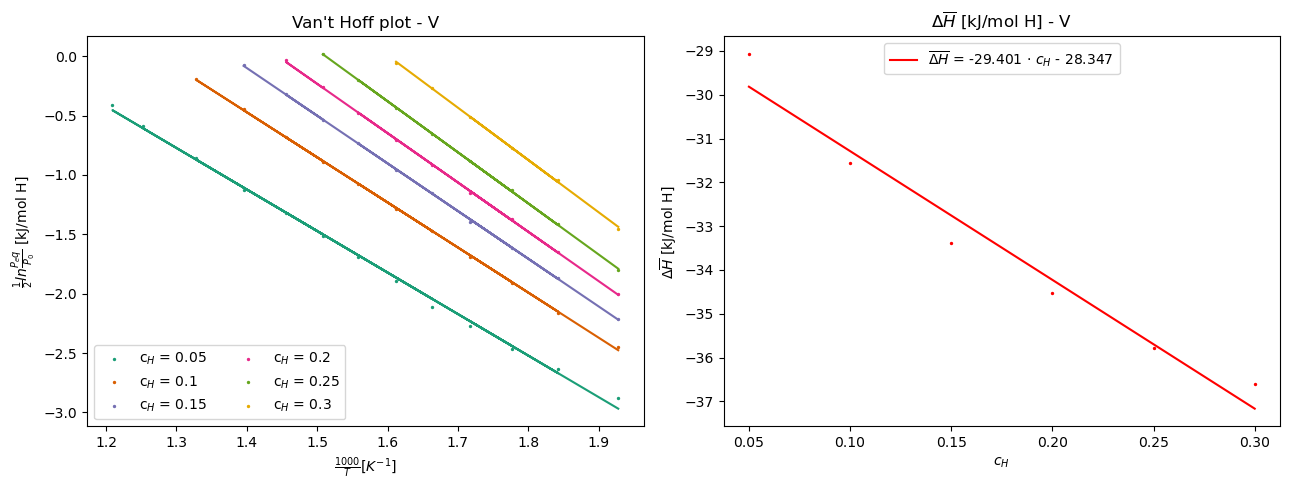

In [16]:
#Van`t Hoff plot and determination of partial molar enthalpy as function of hydrogen composition

coeff={}
for element in H:
    x=H[element][0:,0]
    y=H[element][0:,1]

    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    coeff[element]=(slope,intercept)

def line(a,b,x):
    return a*x+b

def vant_hoff(h,s,x):
    return h*(x/1000) + s

import random

for element in data.keys():
    
    # setting colors palette
    paleta_cores = plt.cm.get_cmap('Dark2') 
    cores = [paleta_cores(_) for _ in range(len(H[element][0:,0]))] 
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cores)


    
    
    my_file = f'vant_hoff_H_{element}'
    fig, axs = plt.subplots(1, 2,  figsize=(13,5))
    for cH in H[element][0:,0]:
        if cH>0:
            idx = np.where(H[element][0:,0]==cH)[0]   
            x = 1000/data_P[element][cH][0:,0] 
            h=H[element][idx,1]/R
            s=S[element][idx,1]/R
            y= ln(data_P[element][cH][0:,1])/2
            
            axs[0].scatter(x, y,s=2, label = f"c$_H$ = {cH}") # experimental data
            
            
            y=vant_hoff(h,s,x)
            axs[0].plot(x,y)  #linear regression/Van't hoff plot
            
            
        axs[0].set_title(f"Van't Hoff plot - {element}")
        axs[0].set_xlabel(r'$\frac{1000}{T} [K^{-1}]$') 
        axs[0].set_ylabel(r"$\frac{1}{2} ln \frac{P_eq}{P_0}$ [kJ/mol H] ")
        axs[0].legend(loc=0,ncol = 2, fontsize = '10')
    
    x= H[element][0:,0]
    a=coeff[element][0]
    b=coeff[element][1]
    y= H[element][0:,1]
    
    c='red'
    axs[1].scatter(x, y,s=2,color= c)
    
    
    y= line(a,b,x)
    axs[1].plot(x, y,color =c, label = r'$\overline{\Delta H}$ = ' +f'{a:.3f} $\cdot$ $c_H$ - {abs(b):.3f}')
   
    
    
    
    axs[1].set_xlabel('$c_H$')
    axs[1].set_ylabel(r"$\Delta \overline{H}$ [kJ/mol H] ")
    axs[1].set_title(r"$\Delta  \overline{H}$ [kJ/mol H]" + f' - {element}')
    axs[1].legend(loc=9)
    

    fig.tight_layout()
    fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')

In [19]:
#organizing Configurational entropy for experimental data

for element in data.keys():
    H[element] = np.array(H[element])
    for T in data[element].keys():
        x= data[element][T][0:,0]
        a=coeff[element][0]
        b=coeff[element][1]
        
        
        data_Sc[element][T] = np.zeros((len(x),2))
        data_Sc[element][T][0:,0] = np.array(x)


        data_Sc[element][T][0:,1] =  (line(a,b,x)/((float(T)))) - (R*ln(data[element][T][0:,1])/2)


/tmp/ipykernel_24315/3681311258.py:2: RuntimeWarning: divide by zero encountered in divide
  return ln(((6-4*cH)**2)/((6-cH)*cH))
/tmp/ipykernel_24315/3681311258.py:5: RuntimeWarning: divide by zero encountered in divide
  return ln(((6-5*cH)**4)*(6-4*cH)/(((6 - 2*cH)**3)*(6 - 3*cH)*cH))


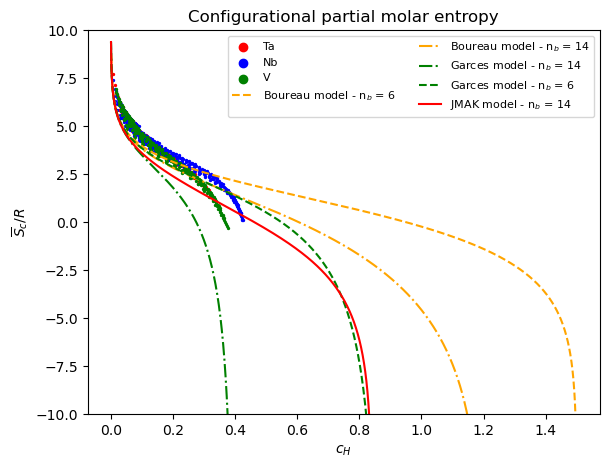

In [75]:
def boureau_2NN(cH):
    return ln(((6-4*cH)**2)/((6-cH)*cH))

def boureau_3NN(cH):
    return ln(((6-5*cH)**4)*(6-4*cH)/(((6 - 2*cH)**3)*(6 - 3*cH)*cH))

my_file = f'Comparison_config_partial_molar.png'
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

c=['red','blue','green']
i=0

for element in data_Sc:
    #experimental data
    for T in data_Sc[element]:
        x=np.array([data_Sc[element][T][idx,0] for idx in range(0,len(data_Sc[element][T][0:,0]),6)])
        y=np.array([data_Sc[element][T][idx,1] for idx in range(0,len(data_Sc[element][T][0:,1]),6)])
        axes.scatter(x,(y+s0(T)/2)/R,s=2,color = c[i])
    axes.scatter([],[],color = c[i], label = f'{element}')
    i=i+1

#Boureau
axes.plot(np.arange(0,1.5,0.001), boureau_2NN(np.arange(0,1.5,0.001)),ls='--' , c= 'orange', label = f'Boureau model - n$_b$ = 6')
axes.plot(np.arange(0,1.2,0.001), boureau_3NN(np.arange(0,1.2,0.001)),ls='-.' , c= 'orange', label = f'Boureau model - n$_b$ = 14')

    

    
#Garces
axes.plot(garces_T_BCC_3NN.fh*garces_T_BCC_3NN.theta, (garces_T_BCC_3NN.dSc[25+273.15])/R,ls='-.' , c= 'green', label = f'Garces model - n$_b$ = 14')
axes.plot(garces_T_BCC_2NN.fh*garces_T_BCC_2NN.theta, (garces_T_BCC_2NN.dSc[25+273.15])/R,ls='--' , c= 'green', label = f'Garces model - n$_b$ = 6')




#Jmak model
axes.plot(JMAK_T_BCC_3NN.fh*JMAK_T_BCC_3NN.theta,JMAK_T_BCC_3NN.dSc[25+273.15]/R,linestyle='-',c='red',label = f'JMAK model - n$_b$ = 14')



axes.set_xlabel('$c_H$') 
axes.set_ylabel(r"$\overline{S}_c/R$")
axes.set_title(f'Configurational partial molar entropy')
axes.legend(loc = 0,ncol=2,fontsize = 8)
#axes.set_xlim([0,0.9])
axes.set_ylim([-10,10])
#axes.invert_yaxis()
fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')


